<a href="https://colab.research.google.com/github/Strako/IAProject/blob/main/Perceptron_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pecreptron :
Implementacion del algoritmo donde aprende dos clases (Setosa, Versicolor)

Librerias
NumPy para operacione scon matrices y algebra lineal.
Pandas para manipulacion de datos. (Para este casi se usa carga y procesar el conjuto de datos Iris).
Matplotlib visualizacion de datos.

In [ ]:
from IPython.display import Image
import numpy as np

class Perceptron(object):
    def _init_(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state



Este constructor inicailiza el perceptron con tres parametros:

eta: tasa de aprendizaje, que controla cuando se ajustan los pesos en cada paso.
n_iter: numero de iteraciones o epocas.
random_state: genera reproducciones, inicializa los pesos de manera alateorea

In [ ]:
    def fit(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
      self.errors_ = []

      for _ in range(self.n_iter):
          errors = 0
          for xi, target in zip(X, y):
            update = self.eta * (target - self.predict(xi))
            self.w[1:] += update * xi
            self.w[0] += update
            errors += int(update != 0.0)
          self.errors_.append(errors)
      return self

**Método FIT** ajusto los datos de entrenamiento.
La variable X es la matriz de características con Y son sus etiquetas correspondientes.

**Selfs.w_** Se inicializan los pesos aleatoriamente. En el vector w_ se incluye un peso adicional para el sesgo en la posición w_[0].

**update, self.w[1:], self.w_[0}** evalua s la prediccion no coincide con un valor real, se ajusta los pesos de forma porporcional entre la prediccion y el valor del objeto [xi] multiplicado por la taza de aprendizaje y los errores se alamecnan en la lista error_ para cada epoca

In [ ]:
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


METODOS AUXILIARES

net_imput: Calcula la suma ponderada de las entradas y los pesos.
predict: Devuelve la prediccion de las clase (-1 o 1)aplica la funcion de activacion

In [ ]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Calcular el angulo en radianes entre dos vectores v1 y v2 usando el coseno del angulo.

df: carga el conjunto de datos Iris que contienen 150 ejemplos de tres especies de iris (setosa, veriscolor, virginica), para este ejemplo solo se toman 100 (50 setosa y 50 versicolor)

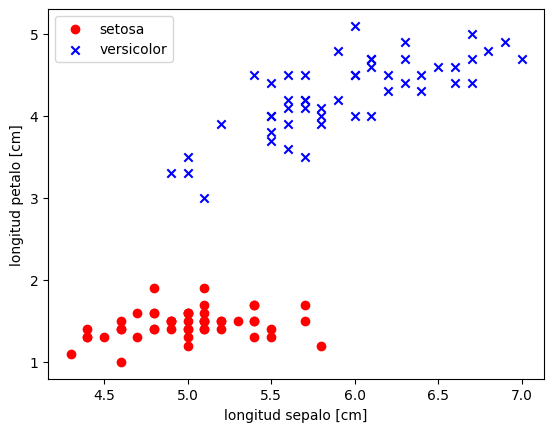

In [ ]:
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('longitud sepalo [cm]')
plt.ylabel('longitud petalo [cm]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epocas')
plt.ylabel('Numero de actualizaciones')
plt.show()